In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')
dftest=pd.read_csv('test.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.loc[df.HomePlanet.isna(),'HomePlanet']=df.loc[~df.HomePlanet.isna(),'HomePlanet'].mode()[0]

In [4]:
df.loc[df.CryoSleep.isna(),'CryoSleep']=df.loc[~df.CryoSleep.isna(),'CryoSleep'].mode()[0]

In [5]:
df.loc[df.Cabin.isna(),'Cabin']=df.loc[~df.Cabin.isna(),'Cabin'].mode()[0]

In [6]:
df.loc[df.Destination.isna(),'Destination']=df.loc[~df.Destination.isna(),'Destination'].mode()[0]

In [7]:
df.loc[df.Age.isna(),'Age']=df.loc[~df.Age.isna(),'Age'].mean()

In [8]:
df.loc[df.VIP.isna(),'VIP']=df.loc[~df.VIP.isna(),'VIP'].mode()[0]

In [9]:
df.loc[df.RoomService.isna(),'RoomService']=0

In [10]:
df.loc[df.FoodCourt.isna(),'FoodCourt']=0

In [11]:
df.loc[df.ShoppingMall.isna(),'ShoppingMall']=0

In [12]:
df.loc[df.Spa.isna(),'Spa']=0

In [13]:
df.loc[df.VRDeck.isna(),'VRDeck']=0

In [14]:
df.loc[df.Name.isna(),'Name']='NoName'

In [15]:
df.isna().sum().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


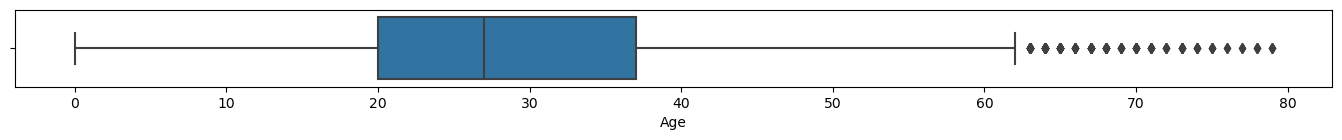

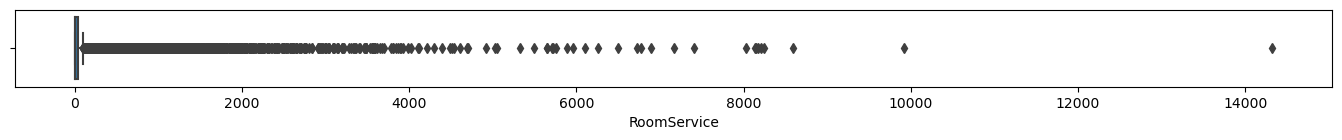

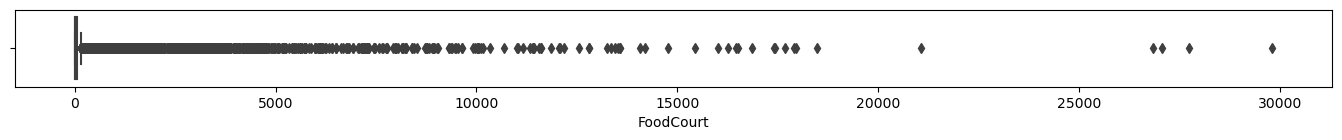

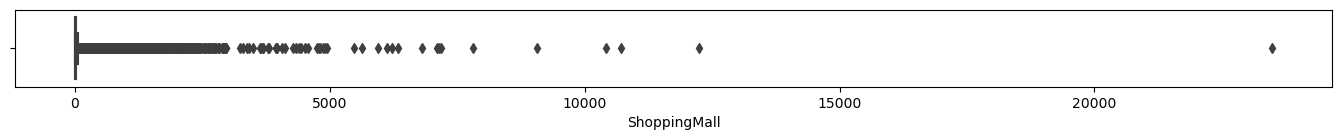

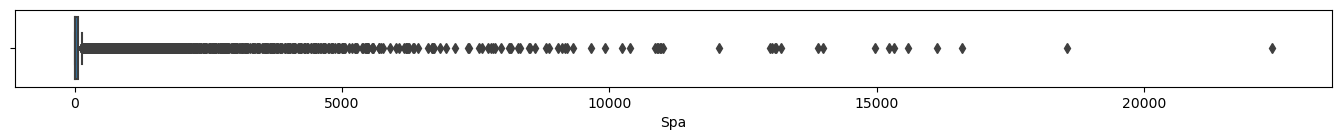

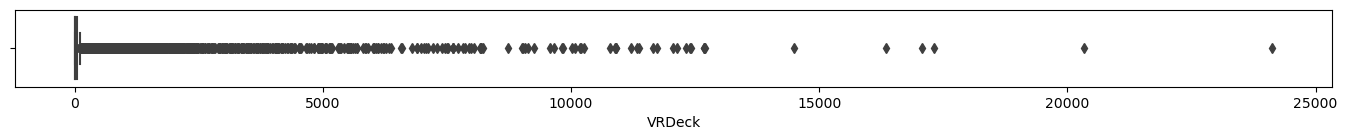

In [17]:
for column in df._get_numeric_data().iloc[:,:6]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df, x=column)

In [18]:
dftestdrop=dftest.drop(columns=['PassengerId','Name'])
dftestdrop

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


In [19]:
dftestdrop.loc[dftestdrop.HomePlanet.isna(),'HomePlanet']=df.loc[~df.HomePlanet.isna(),'HomePlanet'].mode()[0]
dftestdrop.loc[dftestdrop.CryoSleep.isna(),'CryoSleep']=df.loc[~df.CryoSleep.isna(),'CryoSleep'].mode()[0]
dftestdrop.loc[dftestdrop.Cabin.isna(),'Cabin']=df.loc[~df.Cabin.isna(),'Cabin'].mode()[0]
dftestdrop.loc[dftestdrop.Destination.isna(),'Destination']=df.loc[~df.Destination.isna(),'Destination'].mode()[0]
dftestdrop.loc[dftestdrop.Age.isna(),'Age']=df.loc[~df.Age.isna(),'Age'].mean()
dftestdrop.loc[dftestdrop.VIP.isna(),'VIP']=df.loc[~df.VIP.isna(),'VIP'].mode()[0]
dftestdrop.loc[dftestdrop.RoomService.isna(),'RoomService']=0
dftestdrop.loc[dftestdrop.FoodCourt.isna(),'FoodCourt']=0
dftestdrop.loc[dftestdrop.ShoppingMall.isna(),'ShoppingMall']=0
dftestdrop.loc[dftestdrop.Spa.isna(),'Spa']=0
dftestdrop.loc[dftestdrop.VRDeck.isna(),'VRDeck']=0

In [20]:
dftestdrop.isna().sum().sum()

0

In [21]:
dftestdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   object 
 1   CryoSleep     4277 non-null   object 
 2   Cabin         4277 non-null   object 
 3   Destination   4277 non-null   object 
 4   Age           4277 non-null   float64
 5   VIP           4277 non-null   object 
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [22]:
dfdroped=df.drop(columns=['PassengerId','Name','Transported'])
dfdroped

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [23]:
dfall=pd.concat([dfdroped,dftestdrop],axis=0)
dfall

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.00000,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.00000,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.00000,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.00000,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.00000,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G/1496/S,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,G/734/S,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,D/296/P,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,D/297/P,TRAPPIST-1e,28.82793,False,0.0,2680.0,0.0,0.0,523.0


In [25]:
ct = ColumnTransformer([
    ('HomePlanet', OneHotEncoder(), [0]),
    ('CryoSleep', OneHotEncoder(), [1]),
    ('Cabin', OneHotEncoder(), [2]),
    ('Destination', OneHotEncoder(), [3]),
    ('VIP', OneHotEncoder(), [5]),
                       ],
                       remainder='passthrough')
onehot_data_start=ct.fit_transform(dfall)
onehot_data_start=pd.DataFrame(onehot_data_start.toarray())

In [26]:
onehot_data_start

,0,1,2,3,4,5,6,7,8,9,...,9831,9832,9833,9834,9835,9836,9837,9838,9839,9840
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,39.00000,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,24.00000,109.0,9.0,25.0,549.0,44.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,58.00000,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,33.00000,0.0,1283.0,371.0,3329.0,193.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,16.00000,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,34.00000,0.0,0.0,0.0,0.0,0.0
12966,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,42.00000,0.0,847.0,17.0,10.0,144.0
12967,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,28.82793,0.0,0.0,0.0,0.0,0.0
12968,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,28.82793,0.0,2680.0,0.0,0.0,523.0


In [27]:
x=onehot_data_start.iloc[:8693]
x_f=onehot_data_start.iloc[8693:]
y=df.Transported.apply(lambda x:0 if x==False else 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler((0,1))
scaler_data_start=norm.fit_transform(x.copy())
scaler_data_start=pd.DataFrame(scaler_data_start,columns=x.copy().columns)
scaler_data_start

,0,1,2,3,4,5,6,7,8,9,...,9831,9832,9833,9834,9835,9836,9837,9838,9839,9840
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.518987,0.000000,0.228726,0.000000,0.073322,0.003066
8689,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.227848,0.000000,0.000000,0.000000,0.000000,0.000000
8690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.329114,0.000000,0.000000,0.079687,0.000045,0.000000
8691,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.405063,0.000000,0.035186,0.000000,0.015753,0.134049


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(scaler_data_start, y,test_size=0.2,random_state=44)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [31]:
params={'n_jobs':[-1],'max_depth':[7],'n_estimators':[300]}

In [40]:
model=GridSearchCV(XGBClassifier(),param_grid=params,cv=3,verbose=10,n_jobs=-1)

In [41]:
model.fit(X_train,Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [7], 'n_estimators': [300],
                         'n_jobs': [-1]},
             verbose=10)

In [42]:
model.score(X_train,Y_train)

0.9298245614035088

In [43]:
model.score(X_test,Y_test)

0.7602070155261644

In [44]:
y_per=model.predict(X_test)
y_per

array([1, 1, 0, ..., 0, 1, 0])

In [45]:
y_true=Y_test
y_true

5565    0
6867    1
1869    1
4157    1
3129    0
       ..
5423    1
5450    1
6092    1
891     1
6324    0
Name: Transported, Length: 1739, dtype: int64

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_pred=y_per,y_true=y_true))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       840
           1       0.75      0.80      0.77       899

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [48]:
fainal=dftest[['PassengerId']]

In [49]:
fainal['Transported']=model.predict(x_f)

C:\Users\Aghil\AppData\Local\Temp\ipykernel_20328\4199424786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fainal['Transported']=model.predict(x_f)


In [50]:
fainal.Transported.value_counts()

0    2189
1    2088
Name: Transported, dtype: int64

In [51]:
fainal.Transported=fainal.Transported.replace(0.0,'False')
fainal.Transported=fainal.Transported.replace(1.0,'True')

C:\Users\Aghil\AppData\Local\Temp\ipykernel_20328\767555939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fainal.Transported=fainal.Transported.replace(0.0,'False')
C:\Users\Aghil\AppData\Local\Temp\ipykernel_20328\767555939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fainal.Transported=fainal.Transported.replace(1.0,'True')


In [52]:
fainal

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [53]:
fainal.to_csv('output.csv',index=False)